# Mall Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Basic checks

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [5]:
data.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.isnull().sum()  #no null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data[data.duplicated()]   #no duplicate rows present

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.drop(['CustomerID' ],axis =1 ,inplace = True)  # droping customer id column because it is same as index no 


In [10]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### Data Visualization

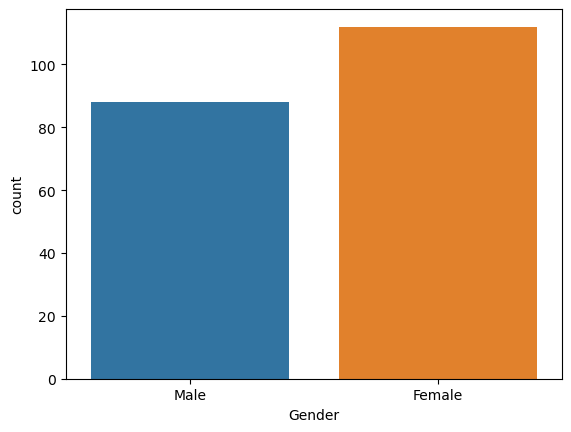

In [11]:
sns.countplot(x = 'Gender',data = data)
plt.show()

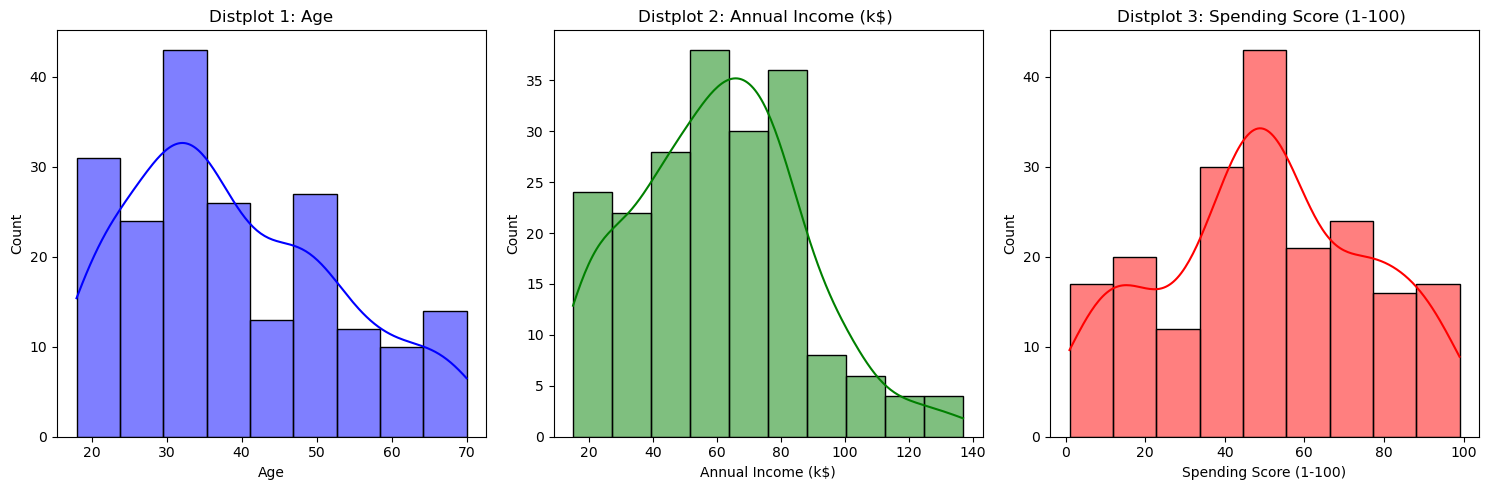

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, color='blue')
plt.title('Distplot 1: Age')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, color='green')
plt.title('Distplot 2: Annual Income (k$) ')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Distplot 3: Spending Score (1-100) ')

plt.tight_layout()
plt.show()

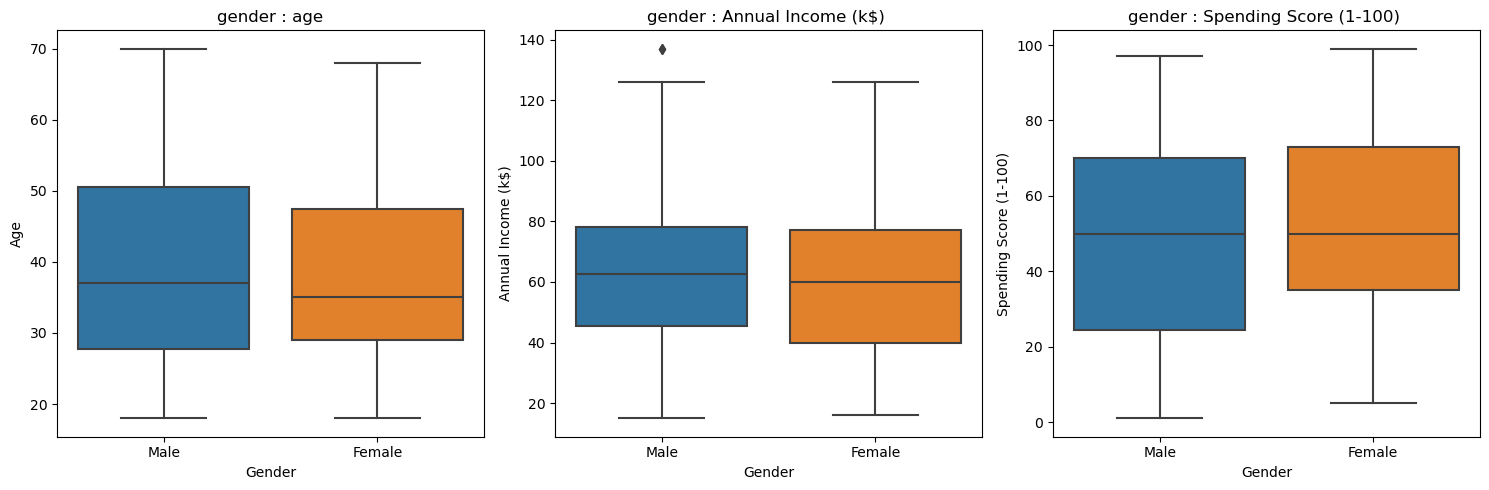

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Gender', y ='Age', data = data)
plt.title('gender : age')

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Gender', y = 'Annual Income (k$)', data = data)
plt.title('gender : Annual Income (k$) ')

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data = data)
plt.title('gender : Spending Score (1-100) ')

plt.tight_layout()
plt.show()

In [14]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

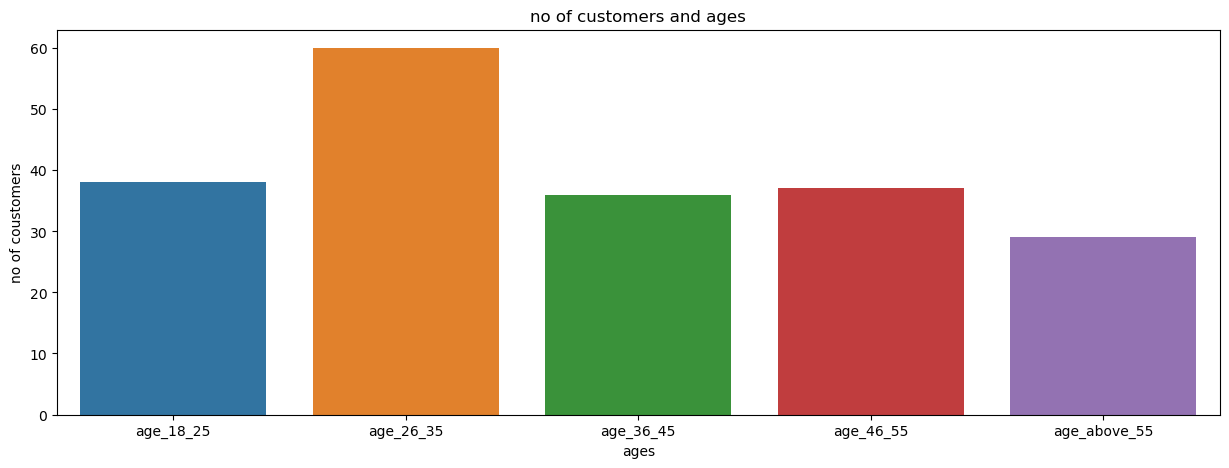

In [15]:
age_18_25 = data['Age'][(data['Age'] >=18) & (data['Age'] <=25)]
age_26_35 = data['Age'][(data['Age'] >=26) & (data['Age'] <=35)] 
age_36_45 = data['Age'][(data['Age'] >=36) & (data['Age'] <=45)]   
age_46_55 = data['Age'][(data['Age'] >=46) & (data['Age'] <=55)] 
age_above_55 = data['Age'][data['Age'] >=56]       

x =  ['age_18_25','age_26_35','age_36_45','age_46_55','age_above_55']
y = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_above_55.values)]

plt.figure(figsize = (15,5))
sns.barplot(x = x, y = y ,data = data)
plt.title('no of customers and ages')
plt.xlabel('ages')
plt.ylabel('no of coustomers')
plt.show()
 
            

In [16]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

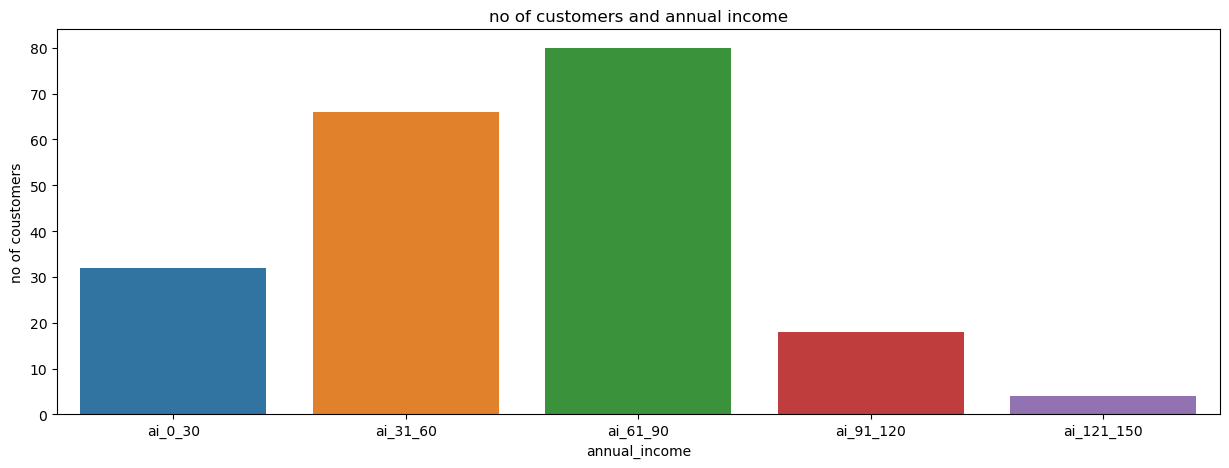

In [17]:
ai_0_30 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >=0) & (data['Annual Income (k$)'] <=30)]
ai_31_60 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >=31) & (data['Annual Income (k$)'] <=60)]
ai_61_90 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >=61) & (data['Annual Income (k$)'] <=90)]
ai_91_120 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >=91) & (data['Annual Income (k$)'] <=120)]
ai_121_150 = data['Annual Income (k$)'][(data['Annual Income (k$)'] >=121) & (data['Annual Income (k$)'] <=150)]
   

x =  ['ai_0_30','ai_31_60','ai_61_90','ai_91_120','ai_121_150']
y = [len(ai_0_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize = (15,5))
sns.barplot(x = x, y = y ,data = data)
plt.title('no of customers and annual income')
plt.xlabel('annual_income')
plt.ylabel('no of coustomers')
plt.show()

In [18]:
data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

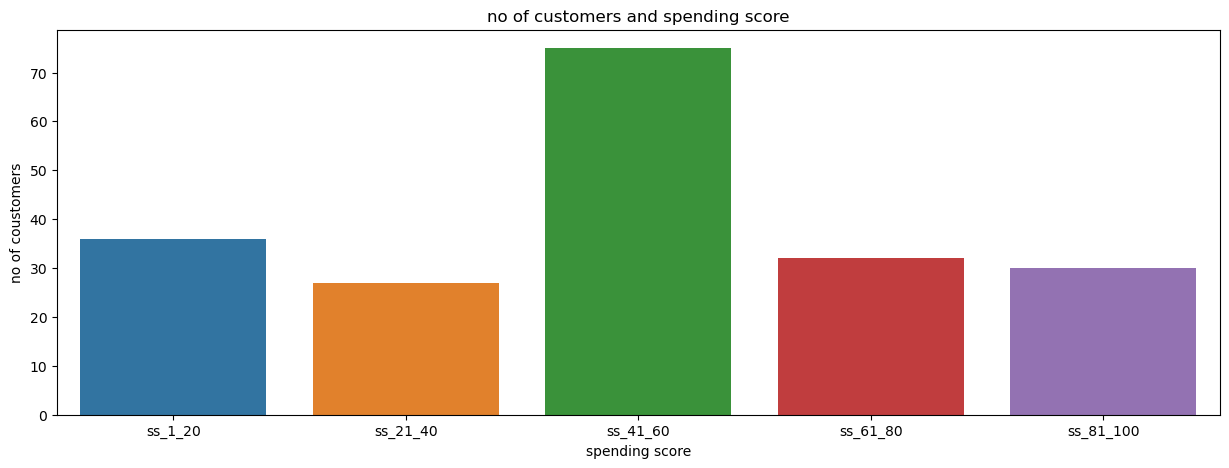

In [19]:
ss_1_20 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=1) & (data['Spending Score (1-100)'] <=20)]
ss_21_40 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=21) & (data['Spending Score (1-100)'] <=40)]
ss_41_60 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=41) & (data['Spending Score (1-100)'] <=60)]
ss_61_80 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=61) & (data['Spending Score (1-100)'] <=80)]
ss_81_100 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=81) & (data['Spending Score (1-100)'] <=100)]

   

x =  ['ss_1_20','ss_21_40','ss_41_60','ss_61_80','ss_81_100']
y = [len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize = (15,5))
sns.barplot(x = x, y = y ,data = data)
plt.title('no of customers and spending score')
plt.xlabel('spending score')
plt.ylabel('no of coustomers')
plt.show()

### Spliting the data ( age and annual income)

In [20]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [21]:
x1= data.iloc[:,1:3]
x1.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


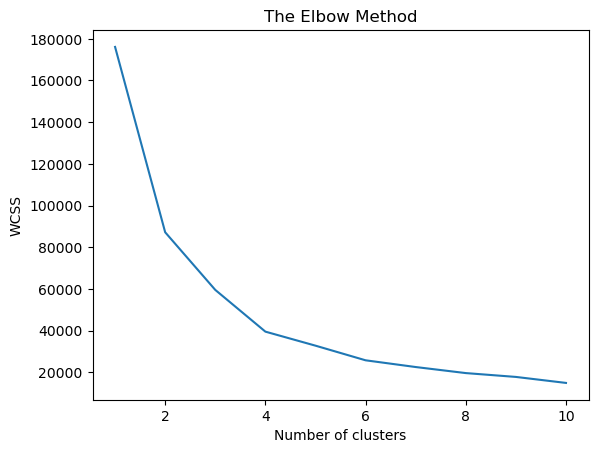

In [22]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###  training

In [23]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(x1)
label

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [24]:
kmeans.cluster_centers_

array([[29.44680851, 29.21276596],
       [37.83333333, 99.88888889],
       [55.98181818, 50.96363636],
       [31.37096774, 70.        ]])

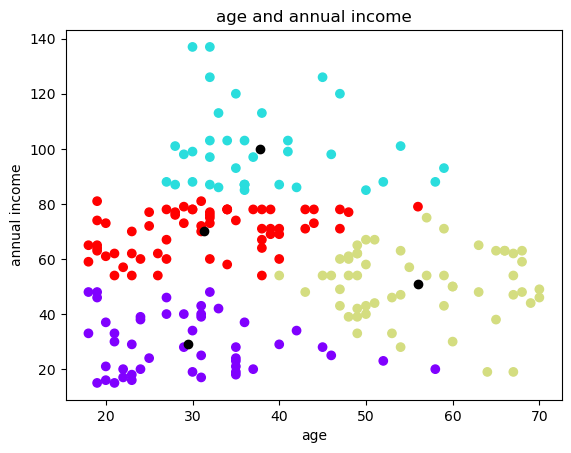

In [25]:
plt.scatter(x1.iloc[:,0],x1.iloc[:,1], c=kmeans.labels_, cmap ='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('age and annual income')
plt.xlabel('age')
plt.ylabel('annual income')
plt.show()

### Evaluation

In [26]:
score = silhouette_score(x1, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.41441024999649884


### Spliting the data ( Age and Spending Score)

In [27]:
x2= data.loc[:,['Age','Spending Score (1-100)']]
x2.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


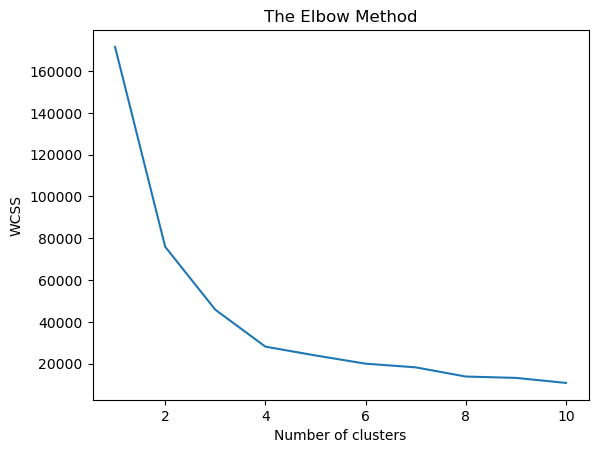

In [28]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training


In [29]:
kmeans = KMeans(n_clusters = 4)
label = kmeans.fit_predict(x2)
label

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [30]:
kmeans.cluster_centers_

array([[43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617],
       [55.70833333, 48.22916667]])

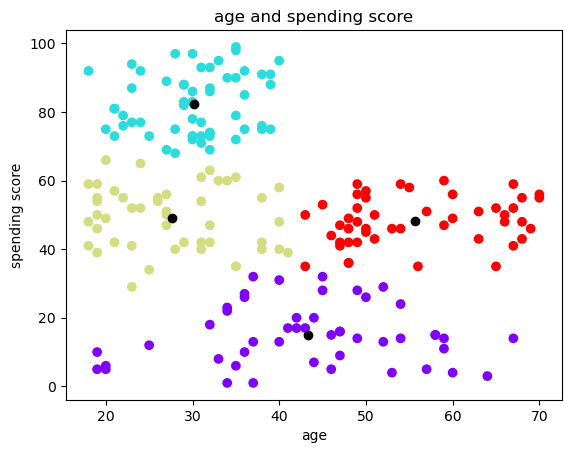

In [31]:
plt.scatter(x2.iloc[:,0],x2.iloc[:,1], c=kmeans.labels_, cmap ='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('age and spending score')
plt.xlabel('age')
plt.ylabel('spending score')
plt.show()

### Evaluation

In [32]:
score = silhouette_score(x2, kmeans.labels_)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.49973941540141753


### Spliting the data (Annual income and Spending Score)

In [33]:
x3= data.iloc[:,2:]
x3.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


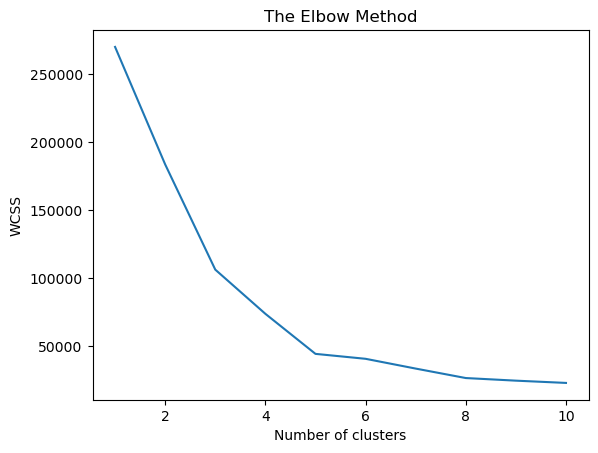

In [34]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training

In [35]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x3)
label

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [36]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [55.0875    , 49.7125    ],
       [25.72727273, 79.36363636]])

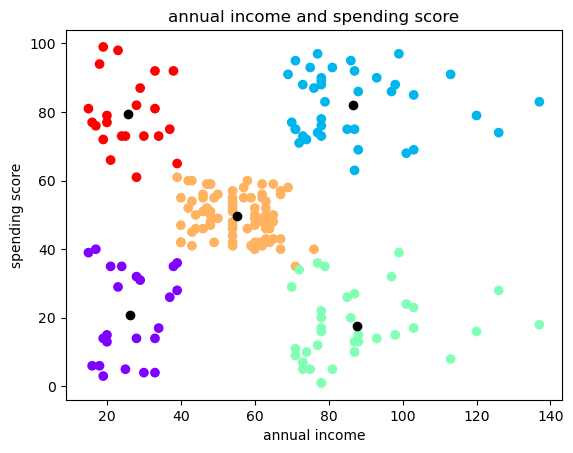

In [37]:
plt.scatter(x3.iloc[:,0],x3.iloc[:,1], c=kmeans.labels_, cmap ='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color = 'black')
plt.title('annual income and spending score')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.show()

### Evaluation

In [38]:
score = silhouette_score(x3, kmeans.labels_)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.5532176107575425


### Spliting the data ( Age, Annual Income, Spending Score)

In [39]:
x =data.iloc[:, 1:]
x.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


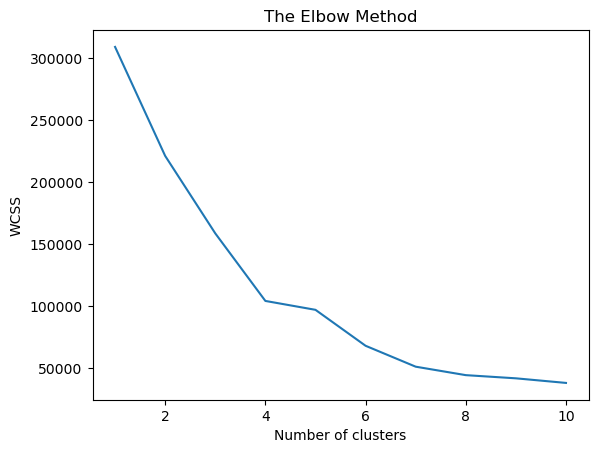

In [40]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training

In [41]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x)
label

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

In [42]:
kmeans.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [43.72727273, 55.48051948, 49.32467532],
       [24.96      , 28.04      , 77.        ],
       [45.2173913 , 26.30434783, 20.91304348],
       [40.66666667, 87.75      , 17.58333333]])

### Ploting 3D graph

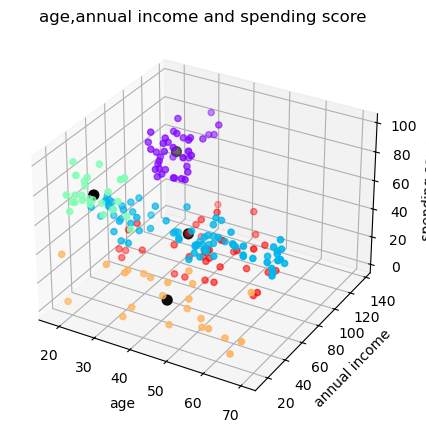

In [43]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2], c=kmeans.labels_, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black', marker='.', s=200, label='Centroids')
ax.set_title('age,annual income and spending score')
ax.set_xlabel('age')
ax.set_ylabel('annual income')
ax.set_zlabel('spending score')  
plt.show()


### Evaluation

In [45]:
score = silhouette_score(x, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.44045315045641703
